In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [21]:
file_path = '/content/LG.csv'

# Đọc dữ liệu từ file CSV
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

In [22]:
df

,Close,Open,High,Low
Date,,,,
2019-03-01,73000.0,72300.0,73775.0,71900.0
2019-03-02,73000.0,72300.0,73775.0,71900.0
2019-03-03,73000.0,72300.0,73775.0,71900.0
2019-03-04,71200.0,70800.0,71800.0,70800.0
2019-03-05,71300.0,70900.0,72000.0,70300.0
...,...,...,...,...
2024-05-28,109300.0,97300.0,109500.0,97200.0
2024-05-29,110500.0,112500.0,113900.0,109000.0
2024-05-30,106300.0,109500.0,111100.0,106200.0


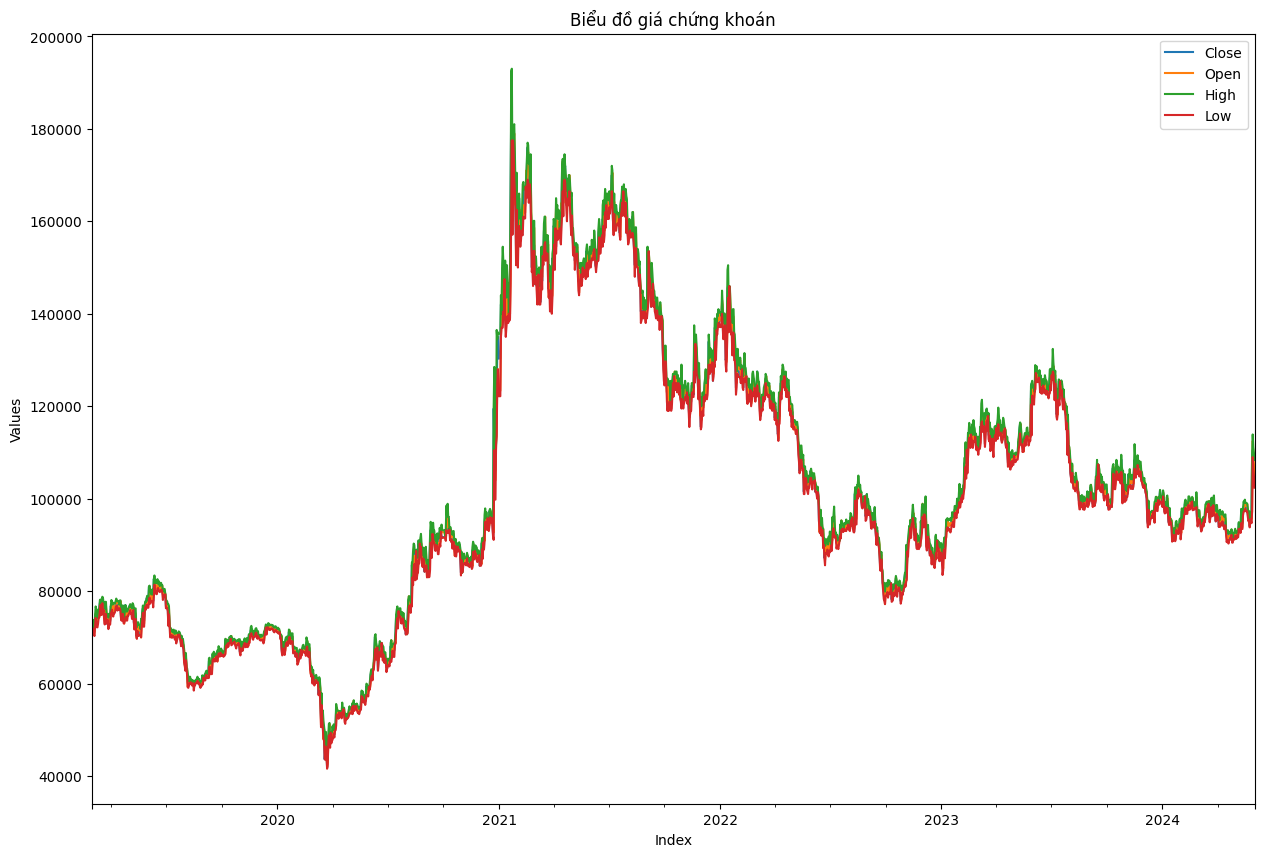

In [23]:

plt.rcParams["figure.figsize"] = [15, 10]

# Thực hiện vẽ biểu đồ
df.plot()
plt.title('Biểu đồ giá chứng khoán')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

In [24]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(df)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -1.8758392645986177
p-value: 0.34351103315178444
Critical Values:
   1%: -3.433805504046101
   5%: -2.8630664092088716
   10%: -2.5675826028083906
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -1.9514720174920446
p-value: 0.3082475604147065
Critical Values:
   1%: -3.433807330975515
   5%: -2.8630672157562103
   10%: -2.567583032262165
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -1.9834629029104982
p-value: 0.2938707786535447
Critical Values:
   1%: -3.433807330975515
   5%: -2.8630672157562103
   10%: -2.567583032262165
==> Không phải chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -1.8179620899346305
p-value: 0.3715811809016861
Critical Values:
   1%: -3.433800034824216
   5%: -2.8630639946701955
   10%: -2.567581317164871
==> Không phải chuỗi dừng



In [25]:
from sklearn.model_selection import train_test_split

# chia bộ dữ liệu theo tỉ lệ 8:2
train, test = train_test_split(df, test_size=0.2, shuffle=False)

# dùng diff để chuyển đổi bộ dữ liệu
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [26]:
# Định nghĩa hàm kiểm tra tính dừng
def check_stationarity(data):
    for col in data.columns:
        result = adfuller(data[col])
        print(f'Kiểm tra tính dừng cho cột {col}:')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        print(f'Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        print(f'==> {"Không phải" if result[1] > 0.05 else "Là"} chuỗi dừng\n')

# Gọi hàm kiểm tra tính dừng với DataFrame của bạn
check_stationarity(train_diff)

Kiểm tra tính dừng cho cột Close:
ADF Statistic: -6.559711828740546
p-value: 8.441073315899627e-09
Critical Values:
   1%: -3.434685171403452
   5%: -2.863454705264858
   10%: -2.5677893640196907
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Open:
ADF Statistic: -6.127691186785527
p-value: 8.550033175456832e-08
Critical Values:
   1%: -3.434688047280661
   5%: -2.8634559745259227
   10%: -2.5677900399105305
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột High:
ADF Statistic: -6.418070294985641
p-value: 1.820234663672767e-08
Critical Values:
   1%: -3.434685171403452
   5%: -2.863454705264858
   10%: -2.5677893640196907
==> Là chuỗi dừng

Kiểm tra tính dừng cho cột Low:
ADF Statistic: -7.161038785851264
p-value: 2.967704935654729e-10
Critical Values:
   1%: -3.4346765666049732
   5%: -2.8634509075517536
   10%: -2.5677873417107437
==> Là chuỗi dừng



In [27]:
!pip install pmdarima

In [28]:
from pmdarima import auto_arima
import pandas as pd
pq = []
for column in train_diff:
    print(f'Cột : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=5, max_q=5, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)

    parameter = stepwise_model.get_params().get('order')
    print(f'bậc tối ưu cho cột:{column} là: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Cột : Close
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=28489.663, Time=0.45 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28564.607, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=28498.750, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=28488.877, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=28489.328, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=28490.717, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=28490.653, Time=0.24 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 1.933 seconds
bậc tối ưu cho cột:Close là: (0, 0, 1) 


Cột : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=28543.870, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28660.792, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=28556.717, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=28541.940, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]            

In [29]:
pq

[(0, 0, 1), (3, 0, 2), (5, 0, 0), (0, 0, 1)]

In [30]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [31]:
df_results_grid = pd.DataFrame(columns=['p', 'q', 'RMSE Open', 'RMSE High', 'RMSE Low', 'RMSE Close'])

for i in pq:
    if i[0] == 0 and i[2] == 0:
        pass
    else:
        print(f'Running for {i}')
        model = VARMAX(train_diff, order=(i[0], i[2])).fit()
        result = model.forecast(steps=len(test))
        inv_res = inverse_diff(df, result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Close'], inv_res.Close_1st_inv_diff))

        new_row = {'p': i[0], 'q': i[2], 'RMSE Open': Opensrmse, 'RMSE High': Highrmse, 'RMSE Low': Lowrmse, 'RMSE Close': Closermse}
        df_results_grid = pd.concat([df_results_grid, pd.DataFrame([new_row])], ignore_index=True)



Running for (0, 0, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (3, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Running for (5, 0, 0)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Running for (0, 0, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
df_results_grid.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close
0,0,1,13730.424040,15710.295259,12803.752536,14121.319655
3,0,1,13730.424040,15710.295259,12803.752536,14121.319655
2,5,0,13912.299378,16017.423204,12915.326356,14315.030493
1,3,2,14898.629966,16474.208243,13453.246594,14458.467169


In [33]:
best_p = df_results_grid.loc[0, 'p']
best_q = df_results_grid.loc[0, 'q']

model = VARMAX(train_diff, order=(best_p, best_q))
results = model.fit()

print(f'p: {best_p}, q: {best_q}')
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p: 0, q: 1
                                  Statespace Model Results                                  
Dep. Variable:     ['Close', 'Open', 'High', 'Low']   No. Observations:                 1535
Model:                                       VMA(1)   Log Likelihood              -53230.894
                                        + intercept   AIC                         106521.789
Date:                              Thu, 20 Jun 2024   BIC                         106681.877
Time:                                      04:32:09   HQIC                        106581.359
Sample:                                  03-02-2019                                         
                                       - 05-14-2023                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     1.20, 90.67, 29.62, 1.56   Jarque-Bera (JB):   20162.53, 12242.68, 23608.40, 6741.92
Prob(Q):                  0.27, 0.00, 0.00,

In [34]:
predict = results.get_prediction(start = len(train), end = len(train) + len(test) - 1)
predicts = predict.predicted_mean

In [35]:
predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
predicts['Date'] = test.index
predicts
predicts_date = predicts.set_index('Date')
predicts_date

,Open_predicted,High_predicted,Low_predicted,Close_predicted
Date,,,,
2023-05-15,25.276987,25.733001,24.772052,25.993194
2023-05-16,25.276987,25.733001,24.772052,25.993194
2023-05-17,25.276987,25.733001,24.772052,25.993194
2023-05-18,25.276987,25.733001,24.772052,25.993194
2023-05-19,25.276987,25.733001,24.772052,25.993194
...,...,...,...,...
2024-05-28,25.276987,25.733001,24.772052,25.993194
2024-05-29,25.276987,25.733001,24.772052,25.993194
2024-05-30,25.276987,25.733001,24.772052,25.993194


In [36]:
# Lấy giá trị cuối cùng của dữ liệu gốc trước khi diff
last_original_values = df.iloc[-len(test) - 1]
# Tạo một DataFrame để chứa các giá trị dự đoán gốc
forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'], index=test.index)

# Khởi tạo giá trị bắt đầu với giá trị cuối cùng của dữ liệu gốc
current_values = last_original_values.copy()

# Thực hiện inverse differencing cho từng ngày dự đoán
for index, row in predicts_date.iterrows():
    current_values['Open'] += row['Open_predicted']
    current_values['High'] += row['High_predicted']
    current_values['Low'] += row['Low_predicted']
    current_values['Close'] += row['Close_predicted']
    # Thêm giá trị hiện tại vào DataFrame kết quả
    forecast_data.loc[index] = current_values

In [37]:


# Tính toán MAPE và RMSE
mape = mean_absolute_percentage_error(test, predicts_date)
rmse = np.sqrt(mean_squared_error(test, predicts_date))
mse = mean_squared_error(test, predicts_date)

print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')
print(f'MAPE: {mape:.4f}')

results_VARMA = pd.DataFrame([['VARMA', mape, mse, rmse]],
               columns = ['Model', 'RMSE', 'MSE', 'MAPE'])
results_VARMA

RMSE: 104060.2682
MSE: 10828539409.9645
MAPE: 0.9998


,Model,RMSE,MSE,MAPE
0,VARMA,0.999752,1.082854e+10,104060.268162


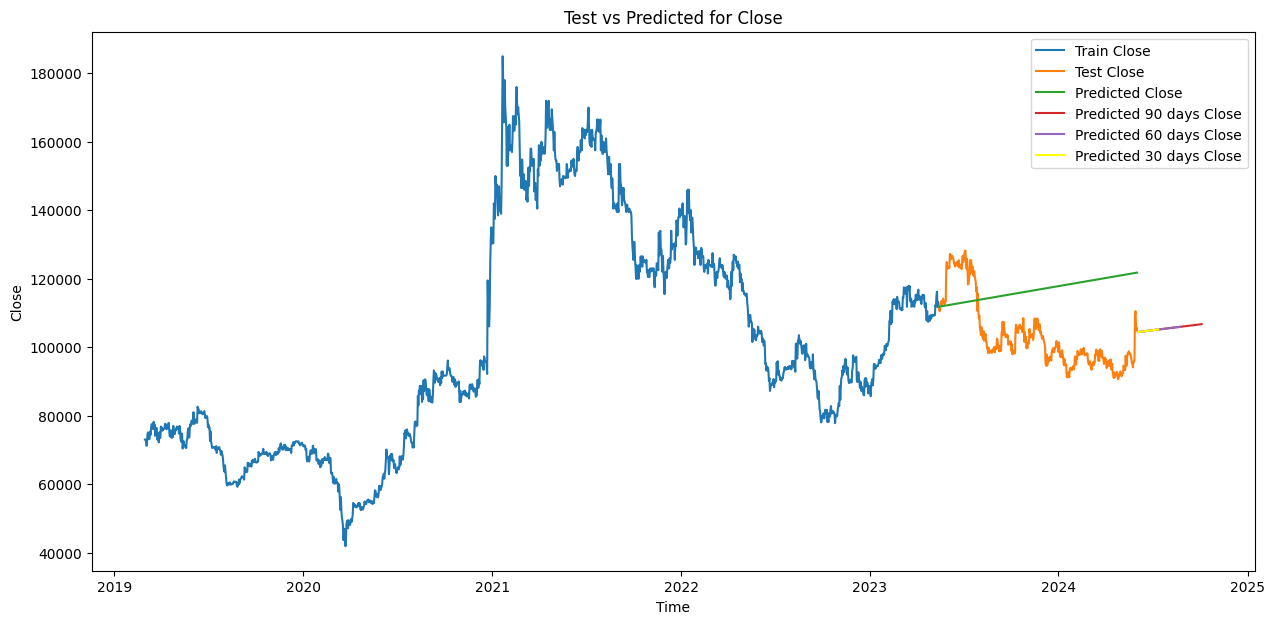

In [38]:
last_original_values_afterPredict = df.iloc[len(df) - 1]  # Adjust this as per your data

# Function to forecast and inverse differencing for given days
def forecast_and_inverse_diff(forecast_days):
    forecast_data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])
    current_values = last_original_values_afterPredict.copy()

    future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='B')
    future_predict = results.get_forecast(steps=forecast_days)
    future_predicts = future_predict.predicted_mean
    future_predicts.columns = ['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted']
    future_predicts['Date'] = future_dates
    future_predicts_date = future_predicts.set_index('Date')

    for index, row in future_predicts_date.iterrows():
        current_values['Open'] += row['Open_predicted']
        current_values['High'] += row['High_predicted']
        current_values['Low'] += row['Low_predicted']
        current_values['Close'] += row['Close_predicted']
        forecast_data.loc[index] = current_values.copy()

    return forecast_data

# Forecast for 30, 60, and 90 days
forecast_data_30days = forecast_and_inverse_diff(30)
forecast_data_60days = forecast_and_inverse_diff(60)
forecast_data_90days = forecast_and_inverse_diff(90)

# Plotting
for col in ['Close']:
    plt.figure(figsize=(15, 7))
    plt.plot(train.index, train[col], label=f'Train {col}')
    plt.plot(test.index, test[col], label=f'Test {col}')
    plt.plot(forecast_data.index, forecast_data[col], label=f'Predicted {col}')
    plt.plot(forecast_data_90days.index, forecast_data_90days[col], label=f'Predicted 90 days {col}')
    plt.plot(forecast_data_60days.index, forecast_data_60days[col], label=f'Predicted 60 days {col}')
    plt.plot(forecast_data_30days.index, forecast_data_30days[col], label=f'Predicted 30 days {col}', color = "yellow")
    plt.title(f'Test vs Predicted for {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.legend()
    plt.show()